# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc = requests.get(btc_url)
btc_content=btc.content
btc_data=btc.json()
btc_data
import json
btc_price=btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth=requests.get(eth_url)
eth_content = eth.content
eth_data=eth.json()
eth_data
import json
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45274.80
The current value of your 5.3 ETH is $13200.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg=200
my_spy=50

In [10]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-01-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit=1000
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      \
                               open    high       low   close    volume   
time                                                                      
2020-01-24 00:00:00-05:00  113.6800  113.89  113.6700  113.80   4588656   
2020-01-27 00:00:00-05:00  114.1400  114.16  114.0470  114.14   3332986   
2020-01-28 00:00:00-05:00  114.1000  114.16  113.9501  114.02   2856052   
2020-01-29 00:00:00-05:00  114.1300  114.35  114.1108  114.30   2628807   
2020-01-30 00:00:00-05:00  114.2800  114.54  114.2350  114.32   5280578   
...                             ...     ...       ...     ...       ...   
2022-01-19 00:00:00-05:00  111.7000  111.89  111.6500  111.71   7641972   
2022-01-20 00:00:00-05:00  111.8400  111.90  111.7500  111.79   6861797   
2022-01-21 00:00:00-05:00  112.1900  112.35  112.1100  112.24   7792653   
2022-01-24 00:00:00-05:00  112.3814  112.42  112.1000  112.12  10666672   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.9600  112.00   9392367   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-01-24 00:00:00-05:00  332.44  332.5300  327.36  328.75   75281306  
2020-01-27 00:00:00-05:00  323.03  325.1200  322.66  323.52   68815393  
2020-01-28 00:00:00-05:00  325.06  327.8500  324.55  326.89   54777923  
2020-01-29 00:00:00-05:00  328.38  328.6300  326.40  326.62   43526297  
2020-01-30 00:00:00-05:00  324.36  327.9100  323.54  327.66   67790010  
...                           ...       ...     ...     ...        ...  
2022-01-19 00:00:00-05:00  458.17  459.6124  451.46  451.79   95311817  
2022-01-20 00:00:00-05:00  453.75  458.7400  444.50  446.79  105009751  
2022-01-21 00:00:00-05:00  445.56  448.0600  437.97  438.11  174541929  
2022-01-24 00:00:00-05:00  432.03  440.3800  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  433.06  439.7200  364.68  434.51  148023735  

[506 rows x 10 columns]

In [17]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end=today
).df
df_closing_prices.index = df_closing_prices.index.date
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.8
Current SPY closing price: $328.75


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16437.50
The current value of your 200 AGG shares is $22760.00


### Savings Health Analysis

In [148]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
df_savings = {
    "Amount":[(my_spy_value + my_agg_value), (my_btc_value + my_eth_value)]
}
names = ["Shares", "Crypto"]
# Create savings DataFrame
# YOUR CODE HERE!
savings_sum = pd.DataFrame(df_savings, index=names)
# Display savings DataFrame
display(savings_sum)

,Amount
Shares,39197.500
Crypto,58475.086


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

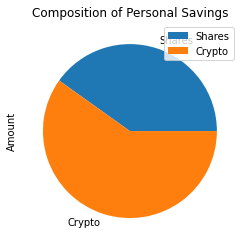

In [149]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_sum.plot.pie(y="Amount", title="Composition of Personal Savings")

In [191]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=int(savings_sum.sum())

# Validate saving health
# YOUR CODE HERE:
if total_savings==emergency_fund:
    print(f"Congratulations on reaching your financial goal!")
elif total_savings > emergency_fund:
    print(f"Congratultions on having plenty of money in this fund!")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from your emergency fund goal!")

Congratultions on having plenty of money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [57]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
ticker = ["SPY","AGG"]
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [65]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [66]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/steveteeters/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994428,1.000195,0.999057,1.002351,1.011034,1.005021,0.992371,1.003240,1.002653,0.999473,...,0.996182,1.006668,0.998789,1.002566,1.007876,0.994575,0.997561,0.998197,0.995822,0.999005
2,0.986829,1.004952,1.003321,0.995471,1.014422,1.000119,0.989429,0.997914,0.997057,1.006085,...,0.991375,1.003210,1.000663,0.997941,1.011680,0.998234,1.009807,1.000954,0.996790,1.003989
3,0.986800,1.009587,1.004416,0.998386,1.014100,1.004887,1.000792,1.002806,0.994033,1.001984,...,0.998326,0.990809,0.994088,1.000312,1.019086,1.009006,1.008930,0.999767,0.995507,1.004494
4,0.984834,1.012736,0.999869,0.991073,1.018265,1.012370,0.997027,1.011307,0.987735,1.012531,...,0.998993,0.991945,1.002109,1.001617,1.021786,1.017815,1.011261,0.983302,0.998831,1.006705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.909965,13.788876,6.421208,8.978943,7.219950,7.312881,7.406178,2.955465,7.957300,28.497906,...,5.071527,7.063758,6.599233,9.443626,7.134668,6.807943,9.185135,6.651933,7.993175,6.820259
7557,9.921548,13.876657,6.433596,8.964325,7.211174,7.335693,7.402357,2.922455,7.966917,28.267221,...,5.073483,7.082848,6.621490,9.502662,7.108527,6.884822,9.118337,6.703969,8.014574,6.780168
7558,9.820134,13.947958,6.493871,8.974444,7.186821,7.301555,7.437888,2.950215,7.943630,28.190147,...,5.082877,7.017297,6.701187,9.569718,7.138873,6.935158,9.162554,6.692687,8.004781,6.721768
7559,9.764249,13.955437,6.398674,8.984602,7.222543,7.337819,7.412277,2.955687,7.891990,28.334239,...,5.077228,7.026138,6.687562,9.622685,7.163354,6.955015,9.209406,6.660777,8.048345,6.722812


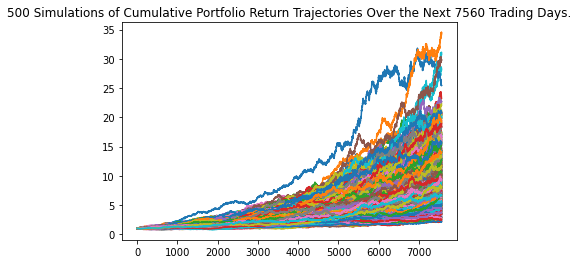

In [67]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()

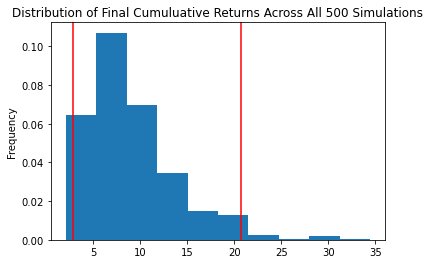

In [68]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              9.083947
std               4.783197
min               2.096901
25%               5.639380
50%               8.019404
75%              11.280580
max              34.437698
95% CI Lower      2.885375
95% CI Upper     20.665066
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*(initial_investment),2)
ci_upper = round(tbl[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57707.51 and $413301.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [75]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*(initial_investment),2)
ci_upper = round(tbl[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86561.26 and $619951.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [99]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/steveteeters/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004534,1.002503,1.001360,0.998752,1.007339,0.996462,1.005535,0.996678,0.996042,1.003511,...,0.998379,1.001921,1.005462,0.997497,0.998817,0.993834,1.002124,1.002399,1.002287,0.997388
2,1.004578,1.003862,1.001055,0.999402,1.009235,0.999597,1.003381,0.998814,0.998649,1.008647,...,0.992648,0.992315,1.006590,1.001068,0.997213,0.992593,1.001960,1.003734,0.997793,1.000109
3,1.002694,0.999540,1.001835,0.999117,1.011483,1.000234,1.003866,0.997284,0.994128,1.004033,...,0.998800,0.993332,1.013189,1.000649,0.993491,0.991753,1.000782,1.002939,0.994983,1.003102
4,1.001882,0.997854,0.998415,0.997523,1.007484,0.995090,1.004411,0.996887,0.996094,1.004177,...,1.004820,0.991589,1.013491,1.005059,0.988528,0.989392,1.003837,1.000104,0.997000,1.009589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.106436,1.431525,1.382734,1.565513,1.586192,1.180364,1.871938,1.473409,1.324412,1.578447,...,0.907586,1.330206,1.028472,1.462673,1.229828,1.158515,1.327479,1.610165,1.220717,1.213486
1257,1.110273,1.421217,1.376894,1.571403,1.575391,1.183633,1.876479,1.470821,1.320060,1.564559,...,0.899392,1.333550,1.028301,1.463851,1.236923,1.166211,1.326627,1.608112,1.222670,1.209698
1258,1.105615,1.422269,1.384058,1.571431,1.576964,1.179831,1.878002,1.469543,1.323254,1.567426,...,0.898465,1.330610,1.026420,1.461331,1.234570,1.166294,1.328257,1.608263,1.224363,1.214376
1259,1.098364,1.415203,1.390506,1.567549,1.573778,1.169386,1.883426,1.477713,1.318162,1.566582,...,0.901405,1.339009,1.021943,1.454439,1.232534,1.163930,1.319839,1.604678,1.225907,1.209619


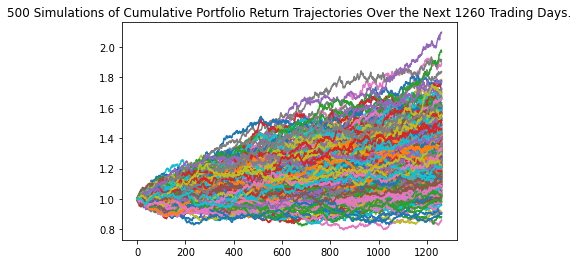

In [100]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_year.plot_simulation()

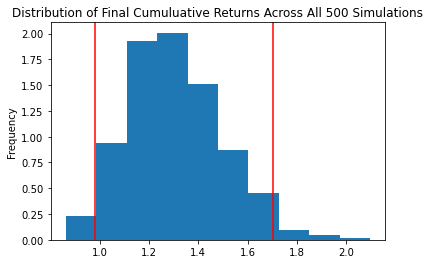

In [101]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_year.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.307727
std               0.193487
min               0.862480
25%               1.164732
50%               1.282620
75%               1.427251
max               2.097478
95% CI Lower      0.982653
95% CI Upper      1.705186
Name: 1260, dtype: float64


In [103]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*(initial_investment),2)
ci_upper_five = round(tbl[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58959.16 and $102311.15


### Ten Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [93]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/steveteeters/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000653,0.999594,1.015599,1.004697,0.997926,0.997555,1.008736,1.003218,0.998291,0.994733,...,1.004863,0.999998,1.000080,1.001563,1.002160,1.007053,0.996062,1.000115,1.000125,1.000930
2,1.005214,0.998104,1.023715,0.996571,1.004193,0.998884,1.006608,0.994205,0.994192,0.994625,...,1.001264,1.003588,1.000311,1.004093,1.004788,1.004089,0.993279,1.003145,0.998557,0.998804
3,1.002223,0.997898,1.023393,0.993325,0.996731,0.998938,1.009237,0.992889,0.992088,0.996237,...,0.996525,1.000264,1.002558,0.997903,1.004738,1.007502,0.998911,1.003954,0.997244,0.994050
4,1.002791,0.996503,1.020927,0.997183,0.997515,0.999524,1.011957,0.991205,0.986147,0.993969,...,1.004415,1.000446,1.002938,0.999570,1.004830,1.008703,0.995329,1.000036,0.995817,0.989877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.728993,1.524440,1.961793,1.516596,2.419684,2.089721,1.906779,1.539094,1.030621,1.559292,...,1.434463,1.236347,1.403231,2.363896,1.474813,2.577191,1.173400,2.307486,1.318705,1.261190
2517,1.729504,1.527305,1.961420,1.516740,2.424542,2.089271,1.910948,1.534658,1.033091,1.554025,...,1.442154,1.242356,1.406314,2.369584,1.471248,2.573957,1.165822,2.301592,1.314230,1.250248
2518,1.730162,1.517907,1.971582,1.516929,2.424807,2.078073,1.904180,1.530341,1.038551,1.562723,...,1.445841,1.245395,1.407826,2.363772,1.473584,2.588569,1.161566,2.285018,1.316242,1.240784
2519,1.736696,1.525387,1.979578,1.519872,2.440579,2.069103,1.904670,1.530905,1.039596,1.578268,...,1.451971,1.247159,1.411111,2.377322,1.471441,2.595910,1.161978,2.281330,1.315971,1.238570


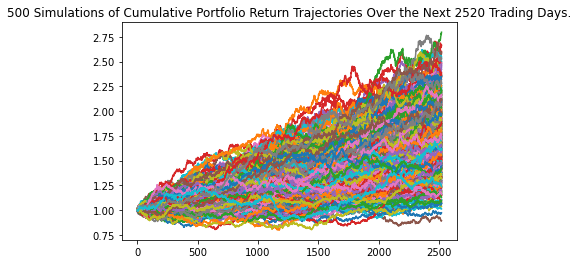

In [94]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_year.plot_simulation()

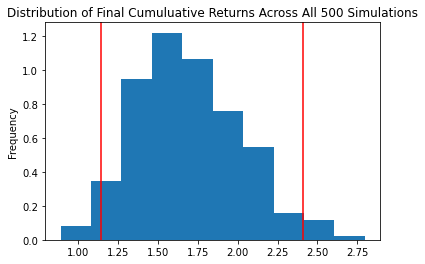

In [95]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_year.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.689855
std               0.326312
min               0.892169
25%               1.453868
50%               1.658113
75%               1.903164
max               2.796705
95% CI Lower      1.146516
95% CI Upper      2.406945
Name: 2520, dtype: float64


In [97]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*(initial_investment),2)
ci_upper_ten = round(tbl[9]*(initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68790.97 and $144416.69
